# 1- Introduction 

In this project, we will develop a classification model that predict and classify  Arabic handwritten characters. This dataset is about the Arabic characters, which is similar to the MNIST dataset[1]. Since this dataset has independent variables for a process that is being analyzed and dependent variables for the output, we will use supervised learning.

Some common algorithms in this section: 

- Naive Bayes [2]
- Support Vector Machines (SVM) [3]
- Decision Tree [4]
- Random Forest [5]
- Convolutional Neural Network (CNN) in Neural Network [6]

## 1-1 Data Set Information from our observation:

The Arabic Handwritten Characters(AHC) dataset has the following features:

- It has 28 classes (characters).
- It has a total of 16800 samples.
- It is divided into two portions; one is the training set, and the other one is the testing set. Thus, the training set has 13440 samples, while the testing set has 3360 samples.
- Since it has 28 classes, each class in the training set has 480 samples, and each class in the testing set has 120 samples, which result in having no **bias**.
- It does not have any missing values (null values), and it is ready for training.

- Taken the CSV files into account: it has rows and columns. **As a result**, each row represents an individual grayscale image, and each column represents a pixel in an image.

- Each pixel has a value from 0 to 255 where these values represent colors; for instance, the number 0 means black, and the number 255 represents white.



# 2- Implementation

## 2-1 Importing all packages

In [1]:
import pandas as pd # data processing for handeling cvs dataset
import numpy as np # linear algebra for supporting pandas and calculations
import keras # a helpful library that acts as an interface for the TensorFlow for predicting models
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt # a library to plot and visualize
# import matplotlib as matplot # a library to plot and visualize
import seaborn as sns # a library to plot and visualize informative statistical graphics
import random
from scipy.ndimage import rotate # for image processing
# importing libraries for metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# importing the models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# importing libraries for layers and preprocessing the data
from sklearn.model_selection import train_test_split
from keras_preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


## 2-2 Loading the dataset


In [2]:
# Load the dataset into dataframes
csvTrainImages = pd.read_csv("dataset/Arabic Handwritten Characters Recognition/csvTrainImages 13440x1024.csv" , header = None)
csvTrainLabel = pd.read_csv("dataset/Arabic Handwritten Characters Recognition/csvTrainLabel 13440x1.csv" , header = None)
csvTestImages = pd.read_csv("dataset/Arabic Handwritten Characters Recognition/csvTestImages 3360x1024.csv" , header = None)
csvTestLabel = pd.read_csv("dataset/Arabic Handwritten Characters Recognition/csvTestLabel 3360x1.csv" , header = None)

In [3]:
# Print the first five information in traing set
csvTrainImages.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Print the labels for traing set
csvTrainLabel

,0
0,1
1,1
2,1
3,1
4,1
...,...
13435,28
13436,28
13437,28
13438,28


In [5]:
# Print the Last five information in testing set
csvTestImages.tail()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
3355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Print the labels for testing set
csvTestLabel

,0
0,1
1,1
2,2
3,2
4,3
...,...
3355,26
3356,27
3357,27
3358,28


## 2-3 Having more insght and visualizing the dataset [7]
### 2-3-1 First, Display how many samples we have

In [7]:
# We read all rows and columns for each file
TrainRow, TrainCol = csvTrainImages.shape
TrainLabelRow, TrainLabelCol = csvTrainLabel.shape
TestRow, TestCol = csvTestImages.shape
TestLabelRow, TestLabelCol = csvTestLabel.shape
data = [[TrainRow, TrainCol], [TrainLabelRow, TrainLabelCol], [TestRow, TestCol], [TestLabelRow, TestLabelCol]]
data = pd.DataFrame(data, columns=["Rows", "Columns"], index =["Train Images", "Train Labels","Test Images", "Test Labels"])
print("The below table illustrates how many rows and columns we have")
print("There are 13440 samples in the training set and 3360 samples in the testing set")
data

The below table illustrates how many rows and columns we have
There are 13440 samples in the training set and 3360 samples in the testing set


,Rows,Columns
Train Images,13440,1024
Train Labels,13440,1
Test Images,3360,1024
Test Labels,3360,1


### 2-3-2 Second, display how many unique classes we have
It means how many characters in our dataset to be trained

In [8]:
Nclasses = len(np.unique(csvTrainLabel))
print("The number of classes is: ", Nclasses)

The number of classes is:  28


### 2-3-3 Third, how many samples per each class with the highest and lowest numbers
- We have to change the dataframe to include reshape, and the way to do it, it is to use the values option.
- iloc[:,:] is to select all rows and columns

In [9]:
train_data = csvTrainImages.iloc[:,:].values.astype('float32') 
train_label = csvTrainLabel.iloc[:,:].values.astype('int32')-1
test_data = csvTestImages.iloc[:,:].values.astype('float32')
test_label = csvTestLabel.iloc[:,:].values.astype('int32')-1

In [10]:
AHCTrainLable = to_categorical(train_label,Nclasses)
AHCTestLable = to_categorical(test_label,Nclasses)

train_label_data = pd.DataFrame(AHCTrainLable)
test_label_data = pd.DataFrame(AHCTestLable)

In [11]:
# Taking the mix and min numbers in each set and display them
MaxTrainData = train_data.max()
MinTrainData = train_data.min()
MaxTestData = test_data.max()
MinTestData = test_data.min()
data = [[MaxTrainData, MaxTestData], [MinTrainData, MinTestData]]
data = pd.DataFrame(data, columns=["Training Data", "Testing Data"], index =["Highest number", "Lowest number"])
data

,Training Data,Testing Data
Highest number,255.0,255.0
Lowest number,0.0,0.0


In [12]:
# count how many sample in each class for the training set
print(train_label_data[train_label_data[0]==1].count())

0     480
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
dtype: int64


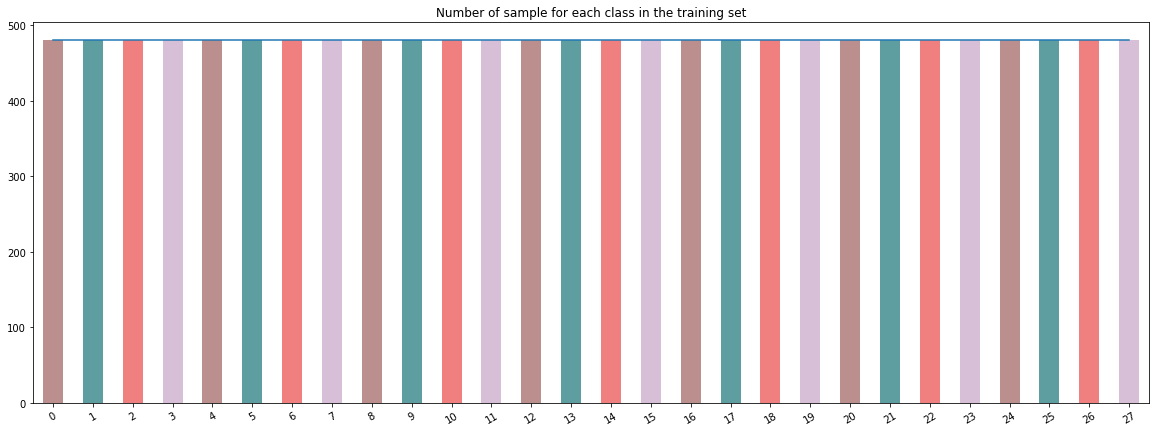

In [13]:
x = train_label_data[train_label_data[0]==1].count()
x.plot(kind = 'bar', 
        color = ['rosybrown', 'cadetblue', 'lightcoral', 'thistle']) 
x.plot(figsize=(20,7))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Number of sample for each class in the training set') 
plt.show()

In [14]:
# count how many sample in each class for the testing set
print(test_label_data[test_label_data[0]==1].count())

0     120
1     120
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
11    120
12    120
13    120
14    120
15    120
16    120
17    120
18    120
19    120
20    120
21    120
22    120
23    120
24    120
25    120
26    120
27    120
dtype: int64


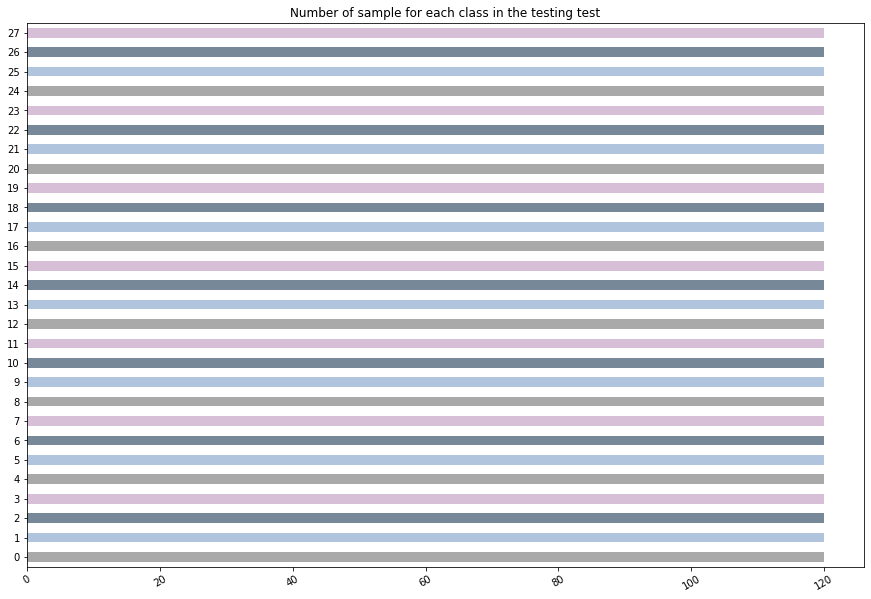

In [15]:
x = test_label_data[test_label_data[0]==1].count()
x.plot(kind = 'barh', 
        color = ['darkgrey', 'lightsteelblue', 'lightslategrey', 'thistle']) 
x.plot(figsize=(15,10))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Number of sample for each class in the testing test') 
plt.show()

### 2-3-4 Fourth, visualize the dataset

In [16]:
arabic_characters = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ',
                    'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع',
                    'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'هـ', 'و', 'ي']

Please Enter the image number - any number from 0 to 13439:55


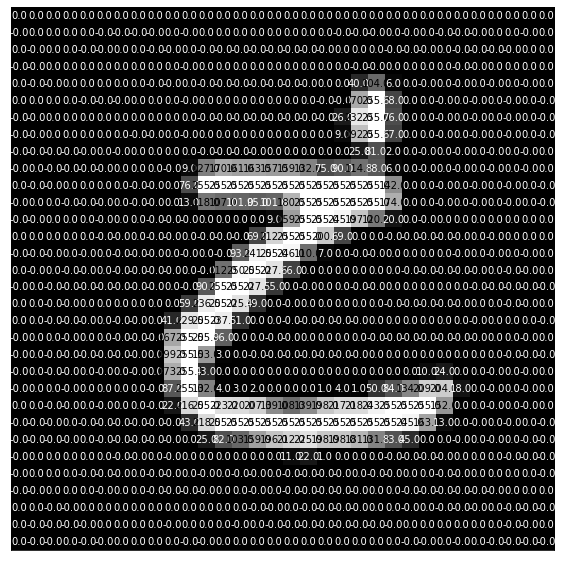

In [17]:
# Taking the number for an image and plot the rows and columns in an individual grayscale image
x = input('Please Enter the image number - any number from 0 to 13439:')
img = train_data[int(x)]
img
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, xticks=[], yticks=[])
img = img.reshape(32, 32)
img = np.flip(img, 0)
img = rotate(img, -90)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

Text(0.5, 1.0, 'و')

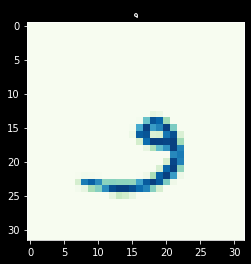

In [18]:
# print a random image from the training set
x = random.randint(0, 13440) # Taking a random sample from 0 to 13440
train_data = train_data.reshape([-1, 32, 32, 1]) # reshape it to display it
plt.style.use('dark_background')
plt.imshow(train_data[x].squeeze().T, cmap="GnBu")
plt.title(arabic_characters[train_label[x][0]])

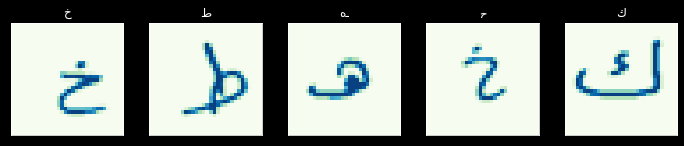

In [19]:
# print five samples
x = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[x[i]].squeeze().T, cmap="GnBu")
    plt.title(arabic_characters[int(train_label[x[i]][0])])
plt.show()

### 2-3-5 Finally, checking Null Values
This is to make sure our model will not have any difficulties during the training

In [20]:
# Printing the dataframe info that shows all the features along with their data types.
csvTrainImages.info()
# To Show number of null values in each column
TrainArabicDatasetNulls = pd.DataFrame(csvTrainImages.isnull().sum().sort_values(ascending=False))
TrainArabicDatasetNulls.columns = ['NO# of null values in the training set']
TrainArabicDatasetNulls.index.name = 'Feature'
print(TrainArabicDatasetNulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB
         NO# of null values in the training set
Feature                                        
1023                                          0
1022                                          0
349                                           0
348                                           0
347                                           0
...                                         ...
677                                           0
676                                           0
675                                           0
674                                           0
0                                             0

[1024 rows x 1 columns]


In [21]:
# Displaying the datatype about the features.
csvTestImages.info()
# To Show number of null values in each column
TestArabicDatasetNulls = pd.DataFrame(csvTestImages.isnull().sum().sort_values(ascending=False))
TestArabicDatasetNulls.columns = ['NO# of null values in the testing set']
TestArabicDatasetNulls.index.name = 'Feature'
print(TestArabicDatasetNulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 26.3 MB
         NO# of null values in the testing set
Feature                                       
1023                                         0
1022                                         0
349                                          0
348                                          0
347                                          0
...                                        ...
677                                          0
676                                          0
675                                          0
674                                          0
0                                            0

[1024 rows x 1 columns]


## 2-4 Data Analytics


In [22]:
# split the dataset into train and test data
train_images, test_images,train_labels, test_labels = train_test_split(csvTrainImages, csvTrainLabel, test_size=0.20, random_state=0, stratify=train_label)

In [23]:
# a function to print the model evaluation
def print_evaluation(model, name):
    print('Accuracy of', name ,'classifier on training set: {:.2f}'
     .format(model.score(train_images, train_labels)))
    print('Accuracy of', name ,'classifier on test set: {:.2f}'
     .format(model.score(test_images, test_labels)))
    predictions = model.predict(test_images)
    accuracy = model.score(test_images, test_labels)
    print(classification_report(test_labels, predictions))

### 2-4-1 Naive Bayes

In [24]:
# Creating a Naive Bayes object for classification and train the model
NB = GaussianNB().fit(train_images, train_labels.values.ravel())

### Model Evaluation

In [25]:
print_evaluation(NB, "Naive Bayes")

Accuracy of Naive Bayes classifier on training set: 0.19
Accuracy of Naive Bayes classifier on test set: 0.13
              precision    recall  f1-score   support

           1       0.32      0.67      0.43        96
           2       0.17      0.38      0.23        96
           3       0.07      0.24      0.11        96
           4       0.16      0.05      0.08        96
           5       0.14      0.05      0.08        96
           6       0.24      0.04      0.07        96
           7       0.13      0.02      0.04        96
           8       0.09      0.94      0.16        96
           9       0.07      0.09      0.08        96
          10       0.11      0.23      0.14        96
          11       0.27      0.07      0.11        96
          12       0.11      0.05      0.07        96
          13       0.29      0.04      0.07        96
          14       0.16      0.10      0.13        96
          15       0.36      0.04      0.07        96
          16       0.22  

### 2-4-2 Support Vector Machines(SVM)

In [26]:
# Creating a Support Vector Machines object for classification and train the model
svc = SVC(kernel='linear').fit(train_images, train_labels.values.ravel())

### Model Evaluation

In [27]:
print_evaluation(svc, "SVM")

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.41
              precision    recall  f1-score   support

           1       0.77      0.90      0.83        96
           2       0.53      0.62      0.57        96
           3       0.28      0.33      0.30        96
           4       0.41      0.44      0.42        96
           5       0.29      0.42      0.34        96
           6       0.28      0.42      0.34        96
           7       0.29      0.25      0.27        96
           8       0.40      0.51      0.45        96
           9       0.50      0.47      0.48        96
          10       0.46      0.53      0.50        96
          11       0.49      0.46      0.47        96
          12       0.43      0.48      0.46        96
          13       0.43      0.40      0.41        96
          14       0.41      0.43      0.42        96
          15       0.43      0.38      0.40        96
          16       0.24      0.27      0.

### 2-4-3 Decision Tree

In [28]:
# Creating a decision tree object for classification and train the model
dt = DecisionTreeClassifier().fit(train_images, train_labels.values.ravel())

### Model Evaluation

In [29]:
print_evaluation(dt, "Decision Tree")

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.33
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        96
           2       0.37      0.44      0.40        96
           3       0.31      0.38      0.34        96
           4       0.32      0.28      0.30        96
           5       0.36      0.30      0.33        96
           6       0.32      0.38      0.34        96
           7       0.22      0.23      0.23        96
           8       0.29      0.35      0.32        96
           9       0.26      0.38      0.31        96
          10       0.52      0.52      0.52        96
          11       0.39      0.44      0.41        96
          12       0.33      0.32      0.32        96
          13       0.28      0.25      0.26        96
          14       0.30      0.28      0.29        96
          15       0.21      0.18      0.19        96
          16       0.

Train the decision tree model with 7 as its depth and 8 leafs

In [30]:
dt1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf = 28, random_state = 0)
dt1.fit(train_images, train_labels)
print('max_depth = {:.0f}, min_samples_leaf = {:.0f}, Accuracy of Decision Tree classifier on training set: {:.2f}'
             .format(7, 8, dt1.score(train_images, train_labels)))
print('max_depth = {:.0f}, min_samples_leaf = {:.0f}, Accuracy of Decision Tree classifier on test set: {:.2f}'
             .format(7, 8, dt1.score(test_images, test_labels)))

max_depth = 7, min_samples_leaf = 8, Accuracy of Decision Tree classifier on training set: 0.36
max_depth = 7, min_samples_leaf = 8, Accuracy of Decision Tree classifier on test set: 0.26


### 2-4-4 Random Forest Classifier

In [31]:
# Creating a random forest object for the classification and train the model
rfc = RandomForestClassifier().fit(train_images, train_labels.values.ravel())

### Model Evaluation

In [32]:
print_evaluation(rfc, "Random Forest")

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.64
              precision    recall  f1-score   support

           1       0.82      0.94      0.87        96
           2       0.68      0.78      0.73        96
           3       0.50      0.52      0.51        96
           4       0.49      0.52      0.51        96
           5       0.69      0.65      0.67        96
           6       0.55      0.67      0.60        96
           7       0.62      0.42      0.50        96
           8       0.56      0.75      0.64        96
           9       0.56      0.66      0.61        96
          10       0.58      0.76      0.66        96
          11       0.66      0.59      0.63        96
          12       0.71      0.78      0.75        96
          13       0.82      0.57      0.67        96
          14       0.57      0.71      0.63        96
          15       0.70      0.51      0.59        96
          16       0.

### 2-4-5 Convolutional Neural Networkk (CNN)

### Normalization
Each pixel value has number from 0 to 255. This value range is too high and it will be difficult for CNN model to learn. The best approach is normalizing the data. In this case, as the pixel value is in the known range it sufficient to scale the pixel values in range [0,1] by simply dividing the array by 255.

- Black would be 0 and white would be 255
- We would also change the labels to be int32

It will be useful when we are categorizing them

In [33]:
# Scale the pixel values in range [0,1] and reshape input images to 32x32x1
# this is to create an input for neural network
train_data = train_data/255
test_data = test_data/255
train_data= train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

### Splitting the data into training and testing.
The testing is for validation purposes.

In [34]:
#  It takes %80 of the data for training
X_train, x_test, Y_train, y_test = train_test_split(train_data, train_label,
                                                    test_size=0.20, random_state=0)

### Building the model ussing Keras

Three Convolutional Blocks
- Each block consists of conv2D layers with relu as an activation layer. Then a MaxPool2D layer and Finally a Dropout layer.
- We have the Flatten Layer before Dense Layer and Output layer.
- MaxPool2D layer is used to reduce the size of the image. Pool size (2,2) means reducing the image from (32,32) to (16,16). Reducing the features.
- Dropout layer drops the few activation nodes while training, which acts as reqularization.
- Output layer has 28 nodes with softmax activation since we have multi-classification with using cross-entropy.

- Filter: the number of filters. ( helps in extracting different features)
- Kernel_size: Number specifying both the height and wedth of the convolution windows. 



In [35]:
# Instantiate an empty sequential model
CNN_Model = Sequential()

# C1 Convolutional Layer. This is the first and the input layer that has 32 features maps.
CNN_Model.add(Conv2D(32, (5,5),activation ='relu', input_shape = (32,32,1)))
# This layer is to downsample the input to enable the model to make assumptions about the features and reduce the overfitting. 
CNN_Model.add(MaxPool2D(pool_size=(2,2)))
# Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
CNN_Model.add(Dropout(0.25))

# this block has 64 filters and (3,3) as its kernel size
CNN_Model.add(Conv2D(64, (3,3),activation ='relu'))
CNN_Model.add(MaxPool2D(pool_size=(2,2)))
CNN_Model.add(Dropout(0.25))

CNN_Model.add(Conv2D(128, (3,3),activation ='relu'))
CNN_Model.add(MaxPool2D(pool_size=(2,2)))
CNN_Model.add(Dropout(0.25))

# Flatten is to convert the multidimensional data into a 1D feature vector to be used by the next layer
CNN_Model.add(Flatten())
CNN_Model.add(Dense(units = 256, activation = "relu"))
CNN_Model.add(Dropout(0.5))
# Output layer with softmax activation since we have multiclass classification issue
CNN_Model.add(Dense(Nclasses, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
# print the model summary
CNN_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
__________

In [37]:
# We used sparse_categorical_crossentropy since there is 28 clases 
CNN_Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Early stopping

Sometimes, if we do not have the right epochs for training, it might lead to overfitting or underfitting. Thus, early stopping allows us to halt the training once the model performance stops improving.

In [38]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [39]:
Model = CNN_Model.fit(X_train, Y_train, epochs=150, verbose=1, shuffle=True,
                                     initial_epoch=0, callbacks=[es], validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10752 samples, validate on 2688 samples
Epoch 1/150
10752/10752 [==============================] - 6s 555us/step - loss: 2.4707 - acc: 0.2412 - val_loss: 1.3826 - val_acc: 0.5283
Epoch 2/150
10752/10752 [==============================] - 6s 518us/step - loss: 1.2535 - acc: 0.5670 - val_loss: 0.7362 - val_acc: 0.7697
Epoch 3/150
10752/10752 [==============================] - 5s 470us/step - loss: 0.8872 - acc: 0.6925 - val_loss: 0.5248 - val_acc: 0.8251
Epoch 4/150
10752/10752 [==============================] - 5s 464us/step - loss: 0.7028 - acc: 0.7591 - val_loss: 0.4095 - val_acc: 0.8783
Epoch 5/150
10752/10752 [==============================] - 5s 458us/step - loss: 0.5811 - acc: 0.7959 - val_loss: 0.3562 - val_acc: 0.8876
Epoch 6/150
10752/10752 [==============================] - 5s 466us/step - loss: 0.4977 - acc: 0.8305 - val_loss: 0.2909 - val_acc: 0.9055
Epoch 7/150
10752/10752

Epoch 57/150
10752/10752 [==============================] - 5s 468us/step - loss: 0.0944 - acc: 0.9699 - val_loss: 0.1152 - val_acc: 0.9688
Epoch 58/150
10752/10752 [==============================] - 5s 461us/step - loss: 0.1004 - acc: 0.9676 - val_loss: 0.1184 - val_acc: 0.9673
Epoch 59/150
10752/10752 [==============================] - 5s 460us/step - loss: 0.0927 - acc: 0.9676 - val_loss: 0.1167 - val_acc: 0.9725
Epoch 60/150
10752/10752 [==============================] - 5s 471us/step - loss: 0.0874 - acc: 0.9708 - val_loss: 0.1156 - val_acc: 0.9717
Epoch 61/150
10752/10752 [==============================] - 5s 464us/step - loss: 0.0879 - acc: 0.9715 - val_loss: 0.1219 - val_acc: 0.9688
Epoch 62/150
10752/10752 [==============================] - 5s 461us/step - loss: 0.0892 - acc: 0.9717 - val_loss: 0.1267 - val_acc: 0.9680
Epoch 63/150
10752/10752 [==============================] - 5s 460us/step - loss: 0.0870 - acc: 0.9721 - val_loss: 0.1218 - val_acc: 0.9688
Epoch 64/150
10752/1

### Model Evaluation


In [40]:
[test_loss, test_acc] = CNN_Model.evaluate(test_data, test_label)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

3360/3360 [==============================] - 0s 122us/step
Evaluation result on Test Data : Loss = 0.1377755729623286, accuracy = 0.9675595238095238


In [41]:
# pred = CNN_Model.predict(test_data)

In [42]:

#The evaluation satge to get the final accuraccy result of our model
score,acc = CNN_Model.evaluate(x_test,y_test,verbose=2)
print("Loss Score: %.2f" % (score))
print("Accuracy: %.2f%%" % (acc*100))
# print(CNN_Model.metrics_names)

Loss Score: 0.13
Accuracy: 96.76%


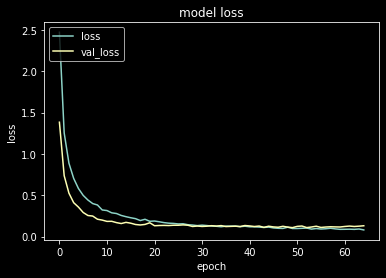

In [43]:
# plot the loss and val_loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

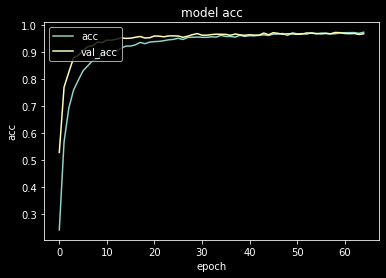

In [44]:
# plot the acc and val_acc
plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

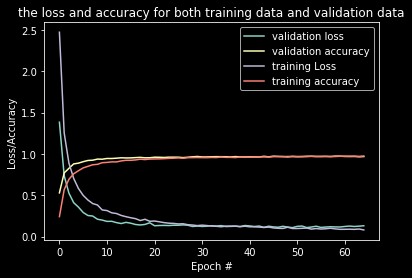

In [45]:
# plot the loss/val_loss and accuracy/val_accuracy for both training data and validation data. 
plt.figure()
plt.plot( Model.history["val_loss"], label="validation loss")
plt.plot( Model.history["val_acc"], label="validation accuracy")
plt.plot( Model.history["loss"], label="training Loss")
plt.plot(Model.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [46]:
y_pred = CNN_Model.predict(test_data, batch_size=100, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_label, y_pred_bool))

3360/3360 [==============================] - 0s 91us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.99      0.98      0.99       120
           2       0.90      0.98      0.94       120
           3       0.99      0.89      0.94       120
           4       0.99      0.96      0.97       120
           5       0.94      0.99      0.96       120
           6       0.98      0.93      0.95       120
           7       0.97      0.97      0.97       120
           8       0.95      0.93      0.94       120
           9       0.94      0.99      0.96       120
          10       0.97      0.91      0.94       120
          11       0.98      0.99      0.99       120
          12       0.99      0.99      0.99       120
          13       0.94      0.99      0.97       120
          14       1.00      0.94      0.97       120
          15       0.96      0.97      0.97       120
          16       0.96

### Testing the model

We test our model by using a sample from the testing data.

Please Enter the image number - any number from 0 to 3359:55


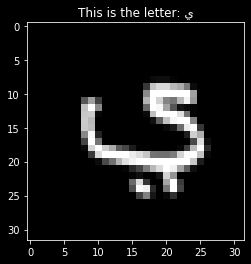

In [47]:
# Taking the number for an image and plot the rows and columns in an individual grayscale image
x = input('Please Enter the image number - any number from 0 to 3359:')
testimage = test_data[[int(x)]]


predict_classe = CNN_Model.predict_classes(testimage)
image_array = testimage.reshape((32, 32))
# The original data is reflected, so the following two lines will flip it; then rotate it for better visulaztion
image_array = np.flip(image_array, 0)
image_array = rotate(image_array, -90)
# print(predict_classe)
plt.imshow(image_array, cmap = 'gray')

# plt.imshow(testimage.reshape((32, 32)), cmap = 'gray')
# plt.title("This is: " + str(predict_classe[0]))
plt.title("This is the letter: " + arabic_characters[predict_classe[0]])
plt.show()

# 3- Remarks and Conclusions

The AHC is a handwritten Arabic character dataset with 16800 samples having 13400 samples for the training set and 3360 samples for the testing set. It is balanced since each class has the same number of samples. In this work, we have implemented five supervised machine learning algorithms because the dataset has labels. We chose to apply Naïve Bayes, SVM, Decision Tree, Random Forest, and CNN because they are widespread. We found out the following:

- Naïve Bayes does not take a long time to train the model. 
- Naïve Bayes, SVM, Decision Tree, and Random forest performed poorly, but among them, Random forest was the best as it achieves an accuracy of 64%.
- CNN achieved the best score with 97%. We have built our model with three convolutional blocks and used some known layers to **enhance the model**, like reducing the features' resolution, so it performed better against noise. Also, we used hyperparameters that fit with our dataset type.

To conclude, CNN was the appropriate and precise model for this kind of dataset because of many features. It has better performance in classified this kind of dataset. In contrast, the other algorithms might need to use dimensionality reduction, such as Principal Component Analysis(PCA), for overcoming feature redundancy in the dataset to enhance the model accuracy.

### for future

This model will detect only one character. But, what if we have two or more characters at once in an image like the plate number, which has numbers and characters?  If we have a dataset as a text, we could use **Natural Language Processing (NLP)**  techniques such as tokenization, stemming or lemmatization, POS. Then we will create a knowledge graph, which gives us an insight. However, as an image, we might use a state-of-the-art Mask-RCNN, which is used for localization and classification.

# References

[1] L. Deng, "The MNIST Database of Handwritten Digit Images for Machine Learning Research [Best of the Web]," in IEEE Signal Processing Magazine, vol. 29, no. 6, pp. 141-142, Nov. 2012, doi: 10.1109/MSP.2012.2211477.

[2] Srishti Sawla, "Introduction to Naive Bayes for Classification", Jun 9,2018, https://medium.com/@srishtisawla/introduction-to-naive-bayes-for-classification-baefefb43a2d

[3] Renu Khandelwal, "Support Vector Machines", November 21, 2018, https://medium.com/datadriveninvestor/support-vector-machines-ae0ff2375479

[4] Yang S, "Decision Tree in Machine Learning", May 17, 2020, https://medium.com/datadriveninvestor/how-decision-tree-model-works-ce681cae10a6

[5] Krishni, "A Beginners Guide to Random Forest Regression", November 27,2018, https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

[6] Renu Khandelwal, "Convolutional Neural Network(CNN) Simplified", October 18, 2018, https://medium.com/datadriveninvestor/convolutional-neural-network-cnn-simplified-ecafd4ee52c5

[7] Pararawendy Indarjo, "Exploratory Data Analysis (EDA) Visualization Using Pandas", March 23, 2020, https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607